# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go



# Import and Create Dataframe

In [65]:
songs = pd.read_csv('/Users/alex/Desktop/School_Projects/5_unsupervised_ML/df_audio_features_10')

In [66]:
df = songs.set_index('song_name')
df = (
    df[['danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 
    'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 
    'duration_ms', 'time_signature']]
)

In [67]:
df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,,,,,,,,,,,,,
My Band,0.851,0.849,1,-3.383,0,0.0828,0.4970,0.000002,0.1160,0.844,120.014,298773,4
The Real Slim Shady,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,284200,4
Águas De Março,0.642,0.339,3,-15.503,1,0.1400,0.8540,0.000000,0.1050,0.491,143.418,212400,4


# Scale distances

## Min-Max Scale

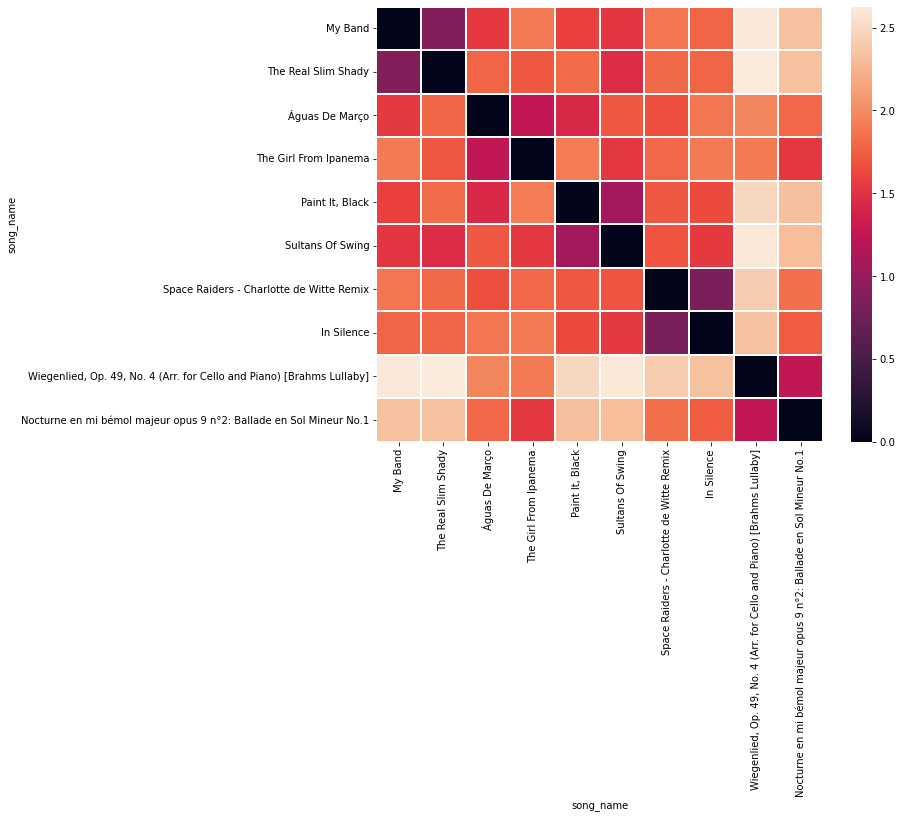

In [68]:
min_max_df = MinMaxScaler().fit_transform(df)
minmax = pd.DataFrame(min_max_df, columns=df.columns, index=df.index)

# Making the DataFrame for the MinMaxed heatmap
minmax_distances = pd.DataFrame(pairwise_distances(minmax), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1) = plt.subplots(1, figsize=(10, 8))

# Plotting the two plots
sns.heatmap(minmax_distances, ax=ax1, linewidths=.2);

## Standard Scaler

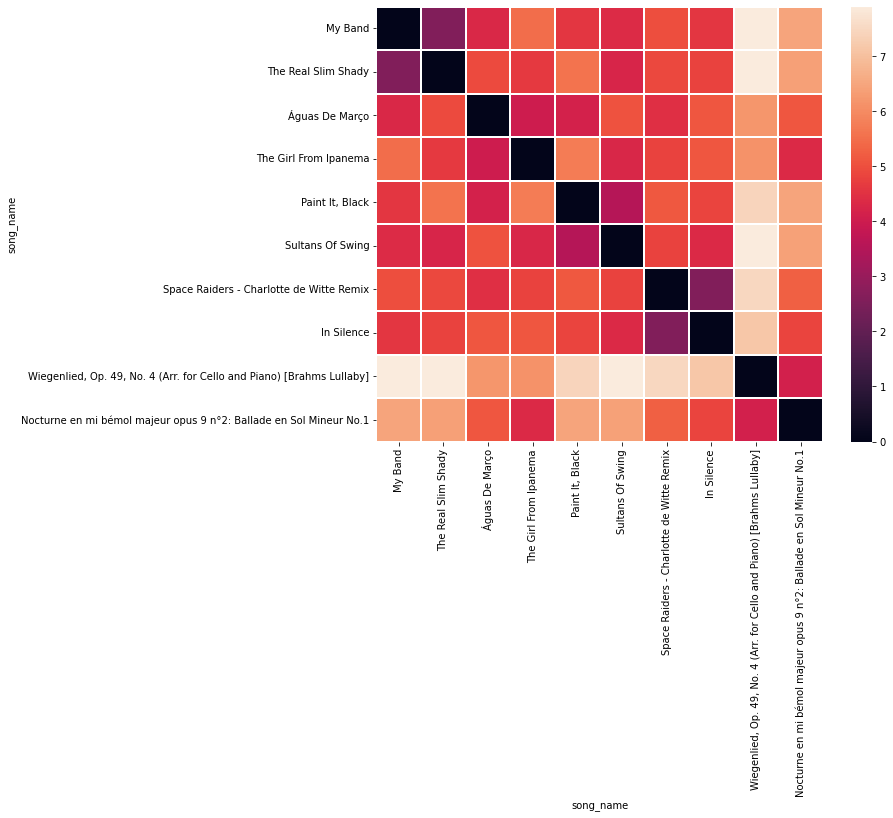

In [69]:
Standard_df = StandardScaler().fit_transform(df)
standard = pd.DataFrame(Standard_df, columns=df.columns, index=df.index)

# Making the DataFrame for the MinMaxed heatmap
standard_distances = pd.DataFrame(pairwise_distances(standard), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1) = plt.subplots(1, figsize=(10, 8))

# Plotting the two plots
sns.heatmap(standard_distances, ax=ax1, linewidths=.2);

## Robust Scaler

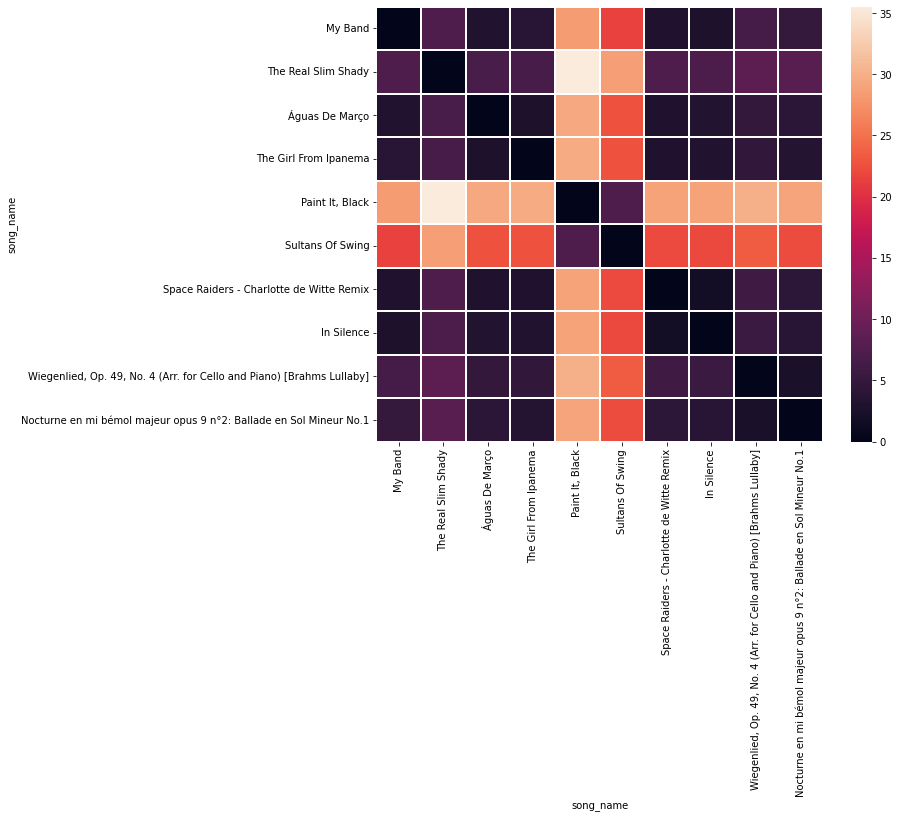

In [70]:
robust_df = RobustScaler().fit_transform(df)
robust = pd.DataFrame(robust_df, columns=df.columns, index=df.index)

# Making the DataFrame for the MinMaxed heatmap
robust_distances = pd.DataFrame(pairwise_distances(robust), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1) = plt.subplots(1, figsize=(10, 8))

# Plotting the two plots
sns.heatmap(robust_distances, ax=ax1, linewidths=.2);

## Quantile Transformer

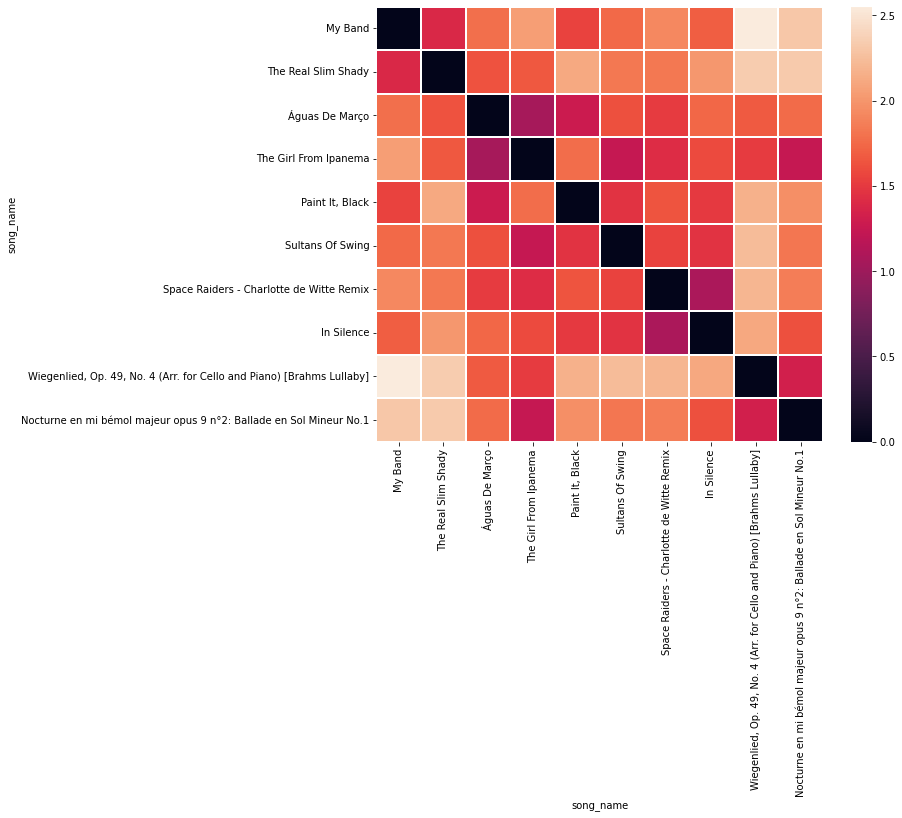

In [71]:
quantile_df = QuantileTransformer(n_quantiles=len(df)).fit_transform(df)
quantile = pd.DataFrame(quantile_df, columns=df.columns, index=df.index)

# Making the DataFrame for the MinMaxed heatmap
quantile_distances = pd.DataFrame(pairwise_distances(quantile), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1) = plt.subplots(1, figsize=(10, 8))

# Plotting the two plots
sns.heatmap(quantile_distances, ax=ax1, linewidths=.2);

## Power Transformer

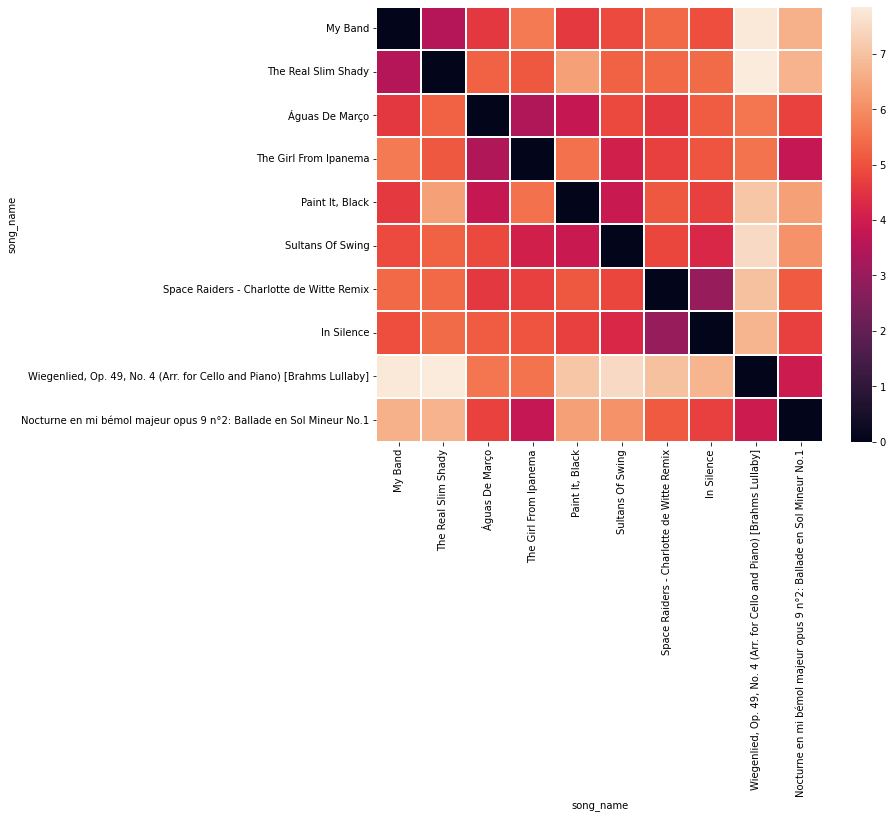

In [72]:
power_df = PowerTransformer().fit_transform(df)
power = pd.DataFrame(power_df, columns=df.columns, index=df.index)

# Making the DataFrame for the MinMaxed heatmap
power_distances = pd.DataFrame(pairwise_distances(power), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1) = plt.subplots(1, figsize=(10, 8))

# Plotting the two plots
sns.heatmap(power_distances, ax=ax1, linewidths=.2);

In [73]:
distance_df = pd.DataFrame(pairwise_distances(df), index=df.index, columns=df.index)

# All HeatMap


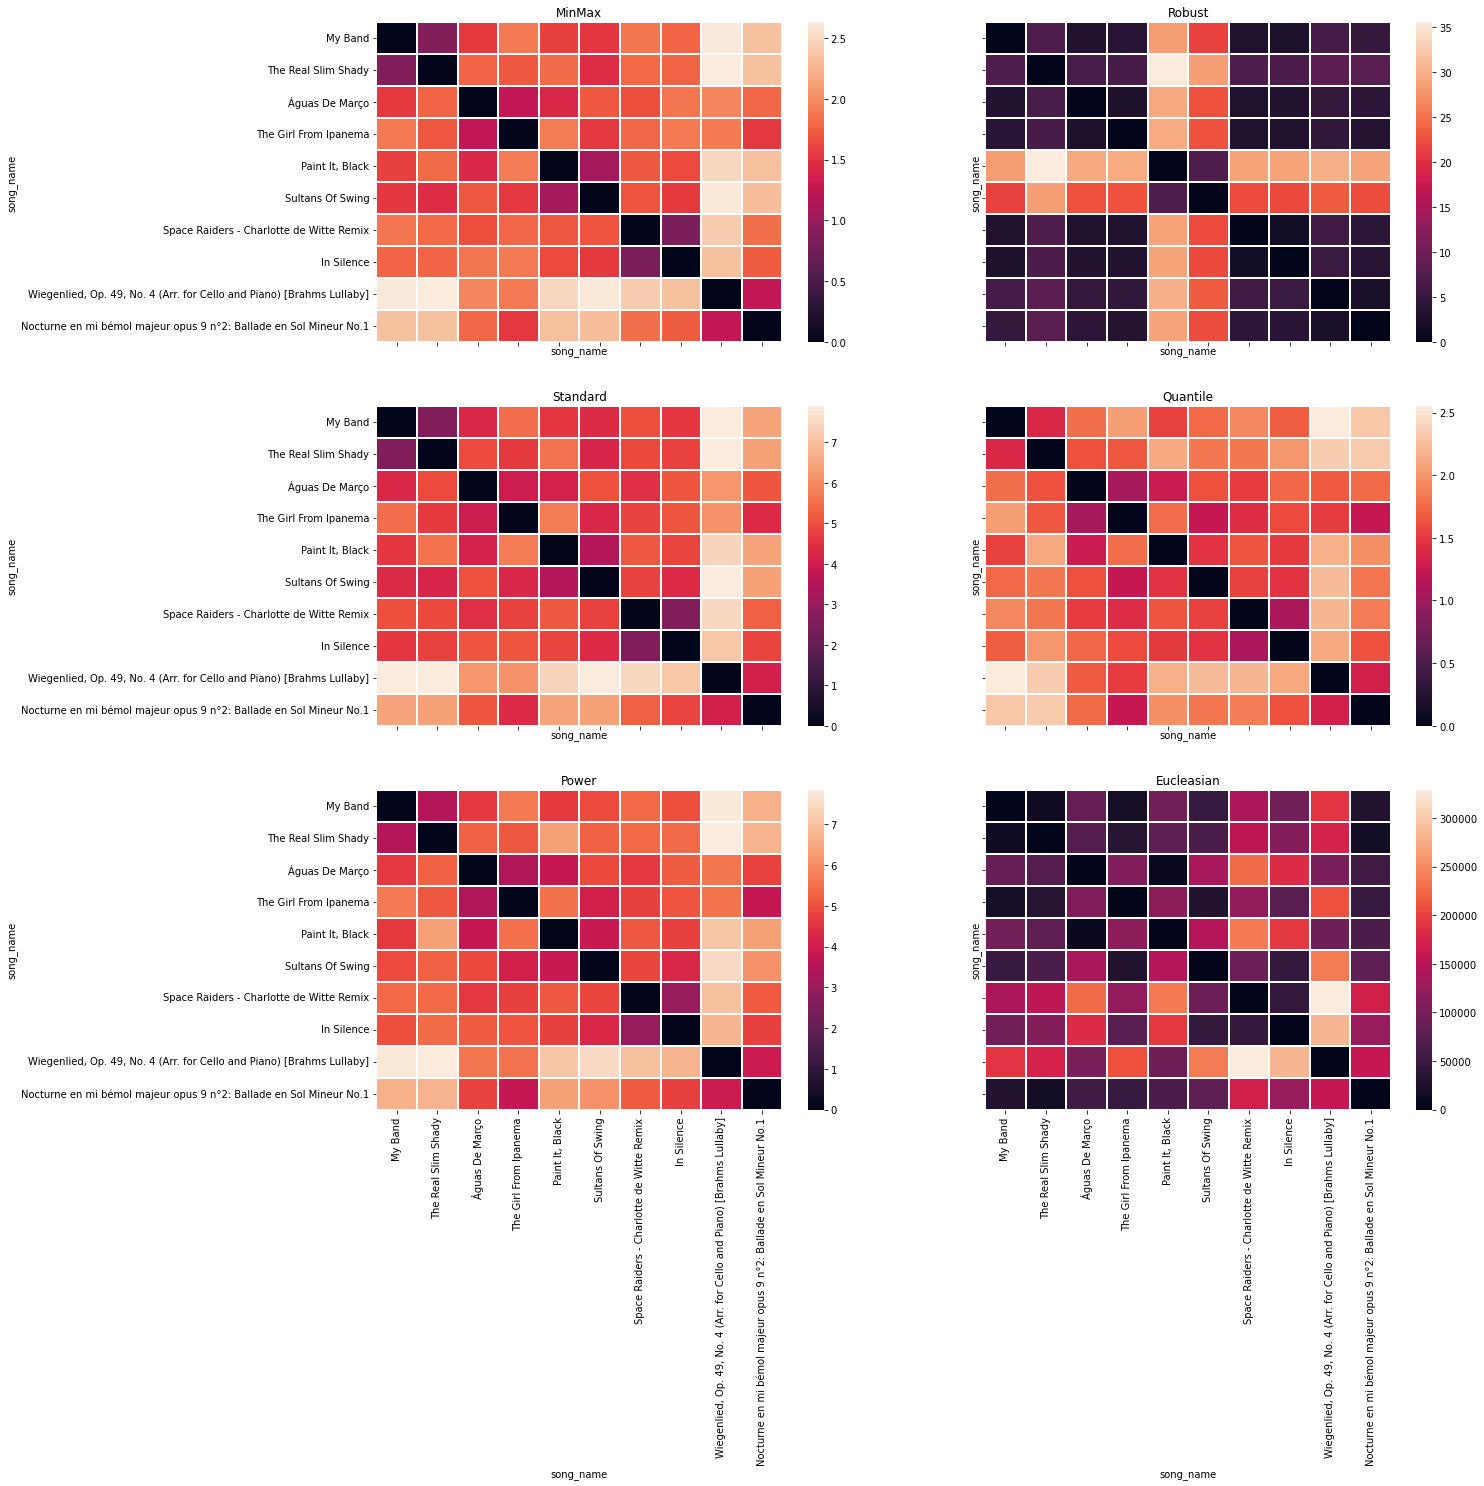

In [74]:
fig, ax = plt.subplots(3,2, figsize=(20, 20), sharex=True, sharey=True)

sns.heatmap(minmax_distances, ax=ax[0, 0], linewidths=.2);
sns.heatmap(robust_distances, ax=ax[0, 1], linewidths=.2);
sns.heatmap(standard_distances, ax=ax[1, 0], linewidths=.2);
sns.heatmap(quantile_distances, ax=ax[1, 1], linewidths=.2);
sns.heatmap(power_distances, ax=ax[2, 0], linewidths=.2);
sns.heatmap(distance_df, ax=ax[2, 1], linewidths=.2);

ax[0, 0].set_title('MinMax')
ax[0, 1].set_title('Robust')
ax[1, 0].set_title('Standard')
ax[1, 1].set_title('Quantile')
ax[2, 0].set_title('Power')
ax[2, 1].set_title('Eucleasian')


plt.show()

In [75]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 5)
# 3. fit the model to the data
my_kmeans.fit(quantile_distances) # pass your scaled data here
# 4. obtain the cluster output
clusters = my_kmeans.predict(quantile_distances) # pass your scaled data here
# 5. attach the cluster output to our original DataFrame
df["cluster"] = clusters

In [76]:
df.groupby(by="cluster").mean() 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.9000,0.755000,3.0,-3.8135,0.0,0.07000,0.26360,0.000001,0.0807,0.8020,112.2590,291486.5,4.0
1,0.6415,0.239500,5.5,-16.1465,1.0,0.08950,0.86050,0.000830,0.1050,0.4395,136.3680,265193.5,4.0
2,0.7425,0.788000,2.5,-11.4410,1.0,0.07285,0.00431,0.884000,0.1110,0.1289,130.0030,416230.0,4.0
3,0.5985,0.794500,3.0,-9.6450,1.0,0.06165,0.05535,0.019570,0.3645,0.7715,153.4325,275445.5,4.0
4,0.2855,0.026715,3.0,-29.1005,1.0,0.04415,0.98950,0.754500,0.1080,0.1410,61.5175,189113.5,3.5


# WITH 100 SONGS

In [77]:
songs_1000_df_full = pd.read_csv('/Users/alex/Desktop/School_Projects/5_unsupervised_ML/df_audio_features_1000')

In [78]:
songs_1000_df_full.head(3)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,NaN,117080,4,5ueyLj6e6oVaTY0KQ6yLaA,https://open.spotify.com/track/5ueyLj6e6oVaTY0...
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,NaN,223760,4,3aEJMh1cXKEjgh52claxQp,https://open.spotify.com/track/3aEJMh1cXKEjgh5...
2,Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,NaN,157293,4,307XEC1IUwUs9ojlEFwH7f,https://open.spotify.com/track/307XEC1IUwUs9oj...


## Set up the DF

In [79]:
songs_1000 = songs_1000_df_full.copy()
songs_1000.pop('id')
songs_1000.pop('html')
df_songs_1000 = songs_1000.set_index('name')
df_songs_1000 = (
    df_songs_1000[['danceability', 'energy', 'key', 
    'loudness', 'mode','speechiness', 'acousticness', 
    'instrumentalness', 'liveness','valence', 'tempo', 
    'duration_ms', 'time_signature']]
)

In [80]:
df_songs_1000.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,,
All Shook Up,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,117080,4
I've Got You Under My Skin - Remastered 1998,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,223760,4
Smoke Gets In Your Eyes,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,157293,4


## Scales

In [81]:
distance_df = pd.DataFrame(pairwise_distances(df_songs_1000), index=df_songs_1000.index, columns=df_songs_1000.index)


min_max_df = MinMaxScaler().fit_transform(df_songs_1000)
minmax = pd.DataFrame(min_max_df, columns=df_songs_1000.columns, index=df_songs_1000.index)

# Making the DataFrame for the MinMaxed heatmap
minmax_distances = pd.DataFrame(pairwise_distances(minmax), index=df_songs_1000.index, columns=df_songs_1000.index)

## Standard Scaler
Standard_df = StandardScaler().fit_transform(df_songs_1000)
standard = pd.DataFrame(Standard_df, columns=df_songs_1000.columns, index=df_songs_1000.index)

# Making the DataFrame for the MinMaxed heatmap
standard_distances = pd.DataFrame(pairwise_distances(standard), index=df_songs_1000.index, columns=df_songs_1000.index)

## Robust Scaler
robust_df = RobustScaler().fit_transform(df_songs_1000)
robust = pd.DataFrame(robust_df, columns=df_songs_1000.columns, index=df_songs_1000.index)

# Making the DataFrame for the MinMaxed heatmap
robust_distances = pd.DataFrame(pairwise_distances(robust), index=df_songs_1000.index, columns=df_songs_1000.index)


## Quantile Transformer
quantile_df = QuantileTransformer(n_quantiles=len(df)).fit_transform(df_songs_1000)
quantile = pd.DataFrame(quantile_df, columns=df_songs_1000.columns, index=df_songs_1000.index)

# Making the DataFrame for the MinMaxed heatmap
quantile_distances = pd.DataFrame(pairwise_distances(quantile), index=df_songs_1000.index, columns=df_songs_1000.index)


## Power Transformer
power_df = PowerTransformer().fit_transform(df_songs_1000)
power = pd.DataFrame(power_df, columns=df_songs_1000.columns, index=df_songs_1000.index)

# Making the DataFrame for the MinMaxed heatmap
power_distances = pd.DataFrame(pairwise_distances(power), index=df_songs_1000.index, columns=df_songs_1000.index)



/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning:

divide by zero encountered in log



## KMeans

## Check how many Clusters and how good the clusters are 

### With Standard Scale Distance

In [82]:
# max_k = 35

# distance_inertia_list = []

# for i in range(1, max_k):
#     myKMeans = KMeans(n_clusters=i)
#     myKMeans.fit(standard_distances)
#     distance_inertia_list.append(round(myKMeans.inertia_))

In [83]:
# max_k = 35
# distance_sil_score = []

# for j in range(2, max_k):
#   labels = KMeans(n_clusters=j).fit(standard_distances).labels_
#   distance_sil_score.append(silhouette_score(standard_distances, labels))

### With Quantile Scale

In [84]:
# max_k = 35

# quantile_inertia_list = []

# for i in range(1, max_k):
#     myKMeans = KMeans(n_clusters=i)
#     myKMeans.fit(quantile_distances)
#     quantile_inertia_list.append(round(myKMeans.inertia_))


In [85]:
# max_k = 35
# quantile_sil_score = []

# for j in range(2, max_k):
#   labels = KMeans(n_clusters=j).fit(quantile_distances).labels_
#   quantile_sil_score.append(silhouette_score(quantile_distances, labels))


### With MinMax Scale

In [86]:
# max_k = 35

# inertia_list_minmax = []

# for i in range(1, max_k):
#     myKMeans = KMeans(n_clusters=i)
#     myKMeans.fit(minmax_distances)
#     inertia_list_minmax.append(round(myKMeans.inertia_))


In [87]:
# max_k = 35
# sil_score_minmax = []

# for j in range(2, max_k):
#   labels = KMeans(n_clusters=j).fit(minmax_distances).labels_
#   sil_score_minmax.append(silhouette_score(minmax_distances, labels))


Text(0.5, 1.0, 'Silhouette Distance Scale')

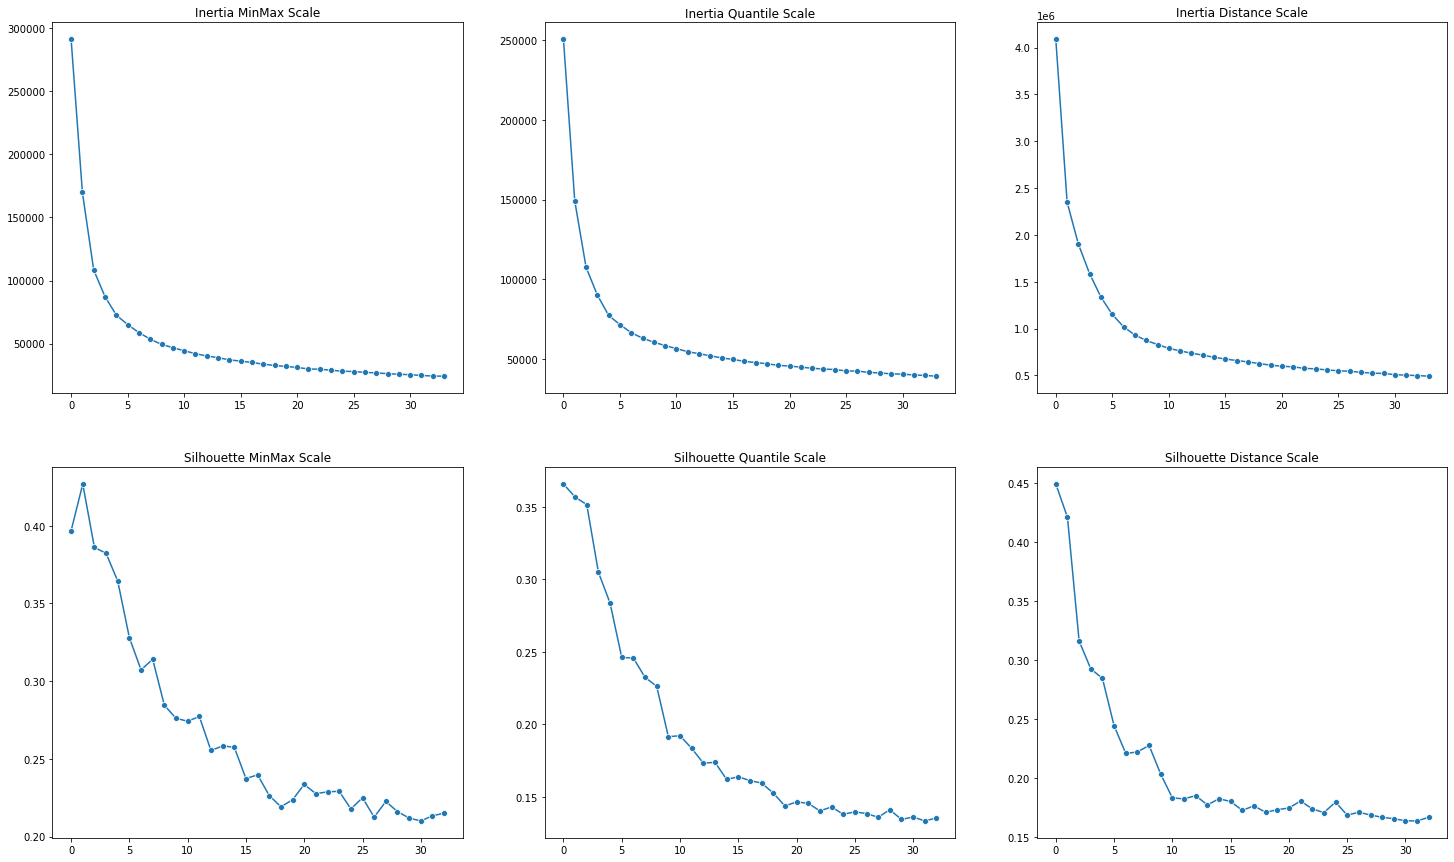

In [88]:
# fig, axes = plt.subplots(2, 3, figsize=(25, 15))

# sns.lineplot(ax=axes[0,0], data=inertia_list_minmax, marker='o')
# sns.lineplot(ax=axes[1,0], data=sil_score_minmax, marker='o')
# sns.lineplot(ax=axes[0,1], data=quantile_inertia_list, marker='o')
# sns.lineplot(ax=axes[1,1], data=quantile_sil_score, marker='o')
# sns.lineplot(ax=axes[0,2], data=distance_inertia_list, marker='o')
# sns.lineplot(ax=axes[1,2], data=distance_sil_score, marker='o')
# axes[0,0].set_title("Inertia MinMax Scale")
# axes[1,0].set_title("Silhouette MinMax Scale")
# axes[0,1].set_title("Inertia Quantile Scale")
# axes[1,1].set_title("Silhouette Quantile Scale")
# axes[0,2].set_title("Inertia Distance Scale")
# axes[1,2].set_title("Silhouette Distance Scale")



## With 5 clusters

In [89]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 5)
# 3. fit the model to the data
my_kmeans.fit(standard_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(standard_distances)
# 5. attach the cluster output to our original DataFrame
df_songs_1000["cluster"] = clusters

In [90]:
df_songs_1000 = df_songs_1000.reset_index()

In [91]:
results = pd.concat([df_songs_1000, songs_1000_df_full.artist], axis=1)
results = results.reindex(columns=['name','artist', 'danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature', 'cluster'])

In [92]:
results.head(3)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,117080,4,0
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,223760,4,0
2,Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,157293,4,1


In [93]:
sample_results = (
    results.groupby('cluster')[['name', 'artist', 'cluster','danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence' ]]
    .head(5).sort_values(by='cluster')
)

### Sample of Playlists 5 clusters

In [ ]:
sample_results

In [101]:
results_means = (
    results.groupby('cluster')[['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence']]
    .agg({
        'key':'mean', 
        'energy':'mean',
        'loudness':'mean', 
        'acousticness':'mean', 
        'tempo':'mean', 
        'instrumentalness':'mean',
        'speechiness':'mean',
        'valence':'mean'
    })
)

In [95]:
sample_results.loc[(sample_results.cluster == 0) | (sample_results.cluster == 2) ,:]

,name,artist,cluster,danceability,energy,loudness,acousticness,tempo,instrumentalness,key,speechiness,valence
0,All Shook Up,Elvis Presley,0,0.6240,0.4680,-12.162,0.881,74.139,0.000006,10,0.1320,0.9520
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0,0.5850,0.2470,-12.612,0.452,127.150,0.000009,1,0.0400,0.5910
3,"What'd I Say, Pt. 1 & 2",Ray Charles,0,0.5400,0.6810,-5.440,0.808,88.385,0.000000,4,0.0508,0.7940
5,That'll Be The Day,Buddy Holly,0,0.5360,0.6370,-7.774,0.467,115.240,0.000000,2,0.0343,0.7980
6,Blueberry Hill,Fats Domino,0,0.4890,0.4990,-9.702,0.740,133.341,0.000236,11,0.0271,0.8290
1429,Symphony No. 6,Allan Pettersson,2,0.0864,0.0665,-26.515,0.828,77.880,0.797000,10,0.0452,0.0387
1158,dlp 1.1,William Basinski,2,0.2800,0.0816,-31.702,0.973,95.380,0.938000,5,0.0406,0.0669


In [96]:
results_means

,danceability,energy,loudness,acousticness,tempo,instrumentalness,speechiness,valence
cluster,,,,,,,,
0,0.642693,0.604747,-7.906631,0.326051,116.309455,0.022664,0.066640,0.617865
1,0.374616,0.191864,-16.809943,0.884384,105.797717,0.394781,0.043719,0.234232
2,0.183200,0.074050,-29.108500,0.900500,86.630000,0.867500,0.042900,0.052800
3,0.640567,0.750658,-6.058795,0.139755,132.660669,0.095790,0.211150,0.568828
4,0.202812,0.144079,-23.379421,0.874267,99.293697,0.719295,0.049470,0.102490


In [102]:
my_std_scaler = StandardScaler()

my_std_scaler.fit(results_means)

scaled_results = my_std_scaler.transform(results_means)

result_means_distance = pd.DataFrame(scaled_results,index=results_means.index, columns=results_means.columns)


In [103]:
result_means_distance = result_means_distance.reset_index()

In [104]:
result_means_distance

,cluster,key,energy,loudness,acousticness,tempo,instrumentalness,speechiness,valence
0,0,-0.585748,0.926484,0.991380,-0.918061,0.524303,-1.194283,-0.249193,1.286674
1,1,-0.708014,-0.593495,-0.017829,0.796607,-0.150184,-0.075819,-0.603154,-0.344438
2,2,1.976385,-1.027213,-1.411895,0.846100,-1.380084,1.345023,-0.615808,-1.115844
3,3,-0.250403,1.463636,1.200836,-1.490184,1.573482,-0.974489,1.982506,1.078180
4,4,-0.432221,-0.769411,-0.762492,0.765537,-0.567516,0.899568,-0.514352,-0.904573


#### Chart

In [105]:
# state the label for each arm of the chart
categories = ['energy', 'loudness', 'acousticness','tempo ','instrumentalness','key','speechiness', 'valence']

# plot the initialised plot
fig = go.Figure()

# add a layer over the top of the initialised plot - this one is for cluster 0
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 0, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'valence'].mean()
],
      theta=categories,
      fill='toself',
      name='Cluster 0',
      marker=dict(color="blue")
))

# add a layer over the top of the initialised plot - this one is for cluster 1
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 1, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 1',
      marker=dict(color="red")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 2, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 2',
      marker=dict(color="green")
))

# add a layer over the top of the initialised plot - this one is for cluster 3
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 3, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 3',
      marker=dict(color="pink")
))

# add a layer over the top of the initialised plot - this one is for cluster 4
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 4, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 4',
      marker=dict(color="yellow")
))



# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1])),` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of mean values of clusters',
  height = 500,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2.5]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()

## With 10 clusters

In [106]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 10)
# 3. fit the model to the data
my_kmeans.fit(standard_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(standard_distances)
# 5. attach the cluster output to our original DataFrame
df_songs_1000["cluster"] = clusters

In [107]:
df_songs_1000 = df_songs_1000.reset_index()

In [108]:
results = pd.concat([df_songs_1000, songs_1000_df_full.artist], axis=1)
results = results.reindex(columns=['name','artist', 'danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature', 'cluster'])

In [109]:
results.head(3)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,117080,4,3
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,223760,4,3
2,Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,157293,4,5


In [110]:
sample_results = (
    results.groupby('cluster')[['name', 'artist', 'cluster','danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence' ]]
    .head(5).sort_values(by='cluster')
)

### Sample of playlist 10 clusters

In [121]:
sample_results

,name,artist,cluster,danceability,energy,loudness,acousticness,tempo,instrumentalness,key,speechiness,valence
50,Tutti Frutti,Little Richard,0,0.5550,0.6580,-3.866,0.7930,184.835,0.000000,5,0.0541,0.9370
12,Johnny B. Goode,Chuck Berry,0,0.5160,0.7980,-9.049,0.7380,168.195,0.000128,10,0.0830,0.9690
48,Baby (You've Got What It Takes),Dinah Washington,0,0.6900,0.5080,-9.920,0.8510,132.892,0.000185,8,0.0469,0.8180
17,Rave On,Buddy Holly,0,0.5660,0.7110,-6.536,0.6110,159.629,0.000007,0,0.0335,0.9610
32,I Get A Kick Out Of You,Frank Sinatra,0,0.3950,0.3750,-10.966,0.5550,178.105,0.000000,5,0.0381,0.7750
715,"Rinaldo, HWV 7a / Act 2: ""Lascia ch'io pianga""",George Frideric Handel,1,0.1980,0.0664,-24.115,0.9810,175.541,0.004760,4,0.0698,0.0398
708,"Tosca / Act 3: ""E lucevan le stelle""",Giacomo Puccini,1,0.1680,0.1450,-13.609,0.9830,86.544,0.770000,11,0.0464,0.0335
702,"Don Giovanni, ossia Il dissoluto punito, K.527...",Wolfgang Amadeus Mozart,1,0.2380,0.0622,-22.349,0.9850,85.183,0.015900,9,0.0498,0.2890
694,"Le nozze di Figaro, K. 492 / Act 3: ""Sull’aria...",Wolfgang Amadeus Mozart,1,0.2450,0.0497,-24.792,0.9850,103.021,0.000008,10,0.0523,0.1040
693,"Gianni Schicchi: ""O mio babbino caro""",Giacomo Puccini,1,0.2550,0.1940,-18.924,0.9790,128.548,0.375000,8,0.0440,0.0799


In [111]:
results_means = (
    results.groupby('cluster')[['energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence']]
    .agg({
        'key':'mean', 
        'energy':'mean',
        'loudness':'mean', 
        'acousticness':'mean', 
        'tempo':'mean', 
        'instrumentalness':'mean',
        'speechiness':'mean',
        'valence':'mean'
    })
)

In [112]:
sample_results.loc[(sample_results.cluster == 0) | (sample_results.cluster == 2) ,:]

,name,artist,cluster,danceability,energy,loudness,acousticness,tempo,instrumentalness,key,speechiness,valence
50,Tutti Frutti,Little Richard,0,0.555,0.6580,-3.866,0.793,184.835,0.000000,5,0.0541,0.9370
12,Johnny B. Goode,Chuck Berry,0,0.516,0.7980,-9.049,0.738,168.195,0.000128,10,0.0830,0.9690
48,Baby (You've Got What It Takes),Dinah Washington,0,0.690,0.5080,-9.920,0.851,132.892,0.000185,8,0.0469,0.8180
17,Rave On,Buddy Holly,0,0.566,0.7110,-6.536,0.611,159.629,0.000007,0,0.0335,0.9610
32,I Get A Kick Out Of You,Frank Sinatra,0,0.395,0.3750,-10.966,0.555,178.105,0.000000,5,0.0381,0.7750
757,"Serse / Act 1 HWV40: ""Ombra mai fu""",George Frideric Handel,2,0.122,0.1370,-21.780,0.950,89.821,0.840000,4,0.0427,0.0458
753,"Lakmé / Act 1: Viens, Mallika, ... Dôme épais ...",Léo Delibes,2,0.240,0.1420,-20.358,0.973,80.252,0.000021,11,0.0573,0.0416
732,"La Bohème / Act 1: ""Sì. Mi chiamano Mimì"" - Live",Giacomo Puccini,2,0.191,0.0766,-22.998,0.972,84.640,0.000079,2,0.0548,0.0358
174,Solsbury Hill,Peter Gabriel,2,0.678,0.6310,-8.624,0.355,102.378,0.000268,11,0.0301,0.4630
96,Chances Are - Single Version,Johnny Mathis,2,0.310,0.2540,-12.200,0.897,77.512,0.000003,10,0.0343,0.2960


In [113]:
results_means

,key,energy,loudness,acousticness,tempo,instrumentalness,speechiness,valence
cluster,,,,,,,,
0,4.678261,0.771599,-6.051565,0.187308,153.232409,0.176049,0.095988,0.488507
1,5.315789,0.110015,-23.544118,0.909382,100.029454,0.761869,0.044464,0.082504
2,5.878788,0.163478,-23.199152,0.836142,92.480848,0.601263,0.044179,0.091221
3,5.379032,0.371024,-11.306202,0.678250,111.905698,0.047393,0.048578,0.482332
4,5.391667,0.695883,-6.098658,0.140885,108.867458,0.008675,0.280125,0.639217
5,4.636792,0.187456,-16.717906,0.896654,106.418783,0.410224,0.043413,0.230029
6,4.828313,0.683319,-6.981901,0.212009,115.870813,0.014366,0.071798,0.680714
7,5.887574,0.686828,-6.501953,0.175234,118.154195,0.014215,0.076406,0.652367
8,7.500000,0.074050,-29.108500,0.900500,86.630000,0.867500,0.042900,0.052800


In [114]:
my_std_scaler = StandardScaler()

my_std_scaler.fit(results_means)

scaled_results = my_std_scaler.transform(results_means)

result_means_distance = pd.DataFrame(scaled_results,index=results_means.index, columns=results_means.columns)


In [115]:
result_means_distance = result_means_distance.reset_index()

In [116]:
result_means_distance

,cluster,key,energy,loudness,acousticness,tempo,instrumentalness,speechiness,valence
0,0,-1.023040,1.158190,0.905191,-0.976330,2.025691,-0.399288,-0.025581,0.423218
1,1,-0.216043,-1.216620,-1.184698,1.175799,-0.690644,1.455224,-0.656211,-1.285168
2,2,0.496612,-1.024712,-1.143484,0.957511,-1.076047,0.946800,-0.659699,-1.248488
3,3,-0.135989,-0.279707,0.277404,0.486915,-0.084290,-0.806570,-0.605852,0.397236
4,4,-0.119996,0.886402,0.899565,-1.114693,-0.239410,-0.929139,2.228170,1.057377
5,5,-1.075531,-0.938640,-0.369149,1.137864,-0.364430,0.342035,-0.669075,-0.664409
6,6,-0.833100,0.841302,0.794041,-0.902707,0.118154,-0.911122,-0.321647,1.231992
7,7,0.507733,0.853898,0.851382,-1.012317,0.234734,-0.911599,-0.265255,1.112711
8,8,2.548775,-1.345720,-1.849492,1.149328,-1.374768,1.789618,-0.675351,-1.410157
9,9,-0.149421,1.065607,0.819238,-0.901370,1.451011,-0.575960,1.650502,0.385688


#### Chart

In [117]:
# state the label for each arm of the chart
categories = ['energy', 'loudness', 'acousticness','tempo ','instrumentalness','key','speechiness', 'valence']

# plot the initialised plot
fig = go.Figure()

# add a layer over the top of the initialised plot - this one is for cluster 0
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 0, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'valence'].mean()
],
      theta=categories,
      fill='toself',
      name='Cluster 0',
      marker=dict(color="blue")
))

# add a layer over the top of the initialised plot - this one is for cluster 1
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 1, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 1',
      marker=dict(color="red")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 2, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 2',
      marker=dict(color="green")
))

# add a layer over the top of the initialised plot - this one is for cluster 3
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 3, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 3',
      marker=dict(color="pink")
))

# add a layer over the top of the initialised plot - this one is for cluster 4
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 4, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 4',
      marker=dict(color="yellow")
))



# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1])),` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of mean values of clusters',
  height = 500,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2.5]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()

# plot the initialised plot
fig2 = go.Figure()

# add a layer over the top of the initialised plot - this one is for cluster 0
fig2.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 5, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 5',
      marker=dict(color="blue")
))

# add a layer over the top of the initialised plot - this one is for cluster 1
fig2.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 6, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 6',
      marker=dict(color="red")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig2.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 7, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 7',
      marker=dict(color="green")
))

# add a layer over the top of the initialised plot - this one is for cluster 3
fig2.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 8, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 8',
      marker=dict(color="pink")
))

# add a layer over the top of the initialised plot - this one is for cluster 4
fig2.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 9, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 9',
      marker=dict(color="yellow")
))



# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1])),` when creating a radar plot
fig2.update_layout(
  title_text = 'Radar chart of mean values of clusters',
  height = 500,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2.5]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig2.show()

In [118]:
# state the label for each arm of the chart
categories = ['energy', 'loudness', 'acousticness','tempo ','instrumentalness','key','speechiness', 'valence']

# plot the initialised plot
fig = go.Figure()



# add a layer over the top of the initialised plot - this one is for cluster 1
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 1, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 1',
      marker=dict(color="red")
))


# add a layer over the top of the initialised plot - this one is for cluster 3
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 3, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 3',
      marker=dict(color="pink")
))

# add a layer over the top of the initialised plot - this one is for cluster 4
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 4, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 4',
      marker=dict(color="yellow")
))

# add a layer over the top of the initialised plot - this one is for cluster 0
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 5, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 5',
      marker=dict(color="blue")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 7, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 7, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 7',
      marker=dict(color="green")
))

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1])),` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of mean values of clusters',
  height = 500,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2.5]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()

# plot the initialised plot
fig2 = go.Figure()

# add a layer over the top of the initialised plot - this one is for cluster 0
fig2.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 0, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'valence'].mean()
],
      theta=categories,
      fill='toself',
      name='Cluster 0',
      marker=dict(color="blue")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig2.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 2, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 2',
      marker=dict(color="green")
))



# add a layer over the top of the initialised plot - this one is for cluster 1
fig2.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 6, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 6, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 6',
      marker=dict(color="red")
))


# add a layer over the top of the initialised plot - this one is for cluster 3
fig2.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 8, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 8, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 8',
      marker=dict(color="pink")
))

# add a layer over the top of the initialised plot - this one is for cluster 4
fig2.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 9, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 9, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 9',
      marker=dict(color="yellow")
))



# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1])),` when creating a radar plot
fig2.update_layout(
  title_text = 'Radar chart of mean values of clusters',
  height = 500,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2.5]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig2.show()

In [119]:
# Cluster 0 : Jazz Classics / Old tutti frutti
# Cluster 1 : Opera
# Cluster 2 : Opera and 50s/Christmas
# Cluster 3 : Jazz Classics and Rock&Roll(Elvis)
# Cluster 4 : Old tutti frutti / Recent Pop / RockReggea (Police)
# Cluster 5 : REALLY GOOD -> Jazz / Melodic
# Cluster 6 : Old chill Rock/Christmas
# Cluster 7 : REALLY GOOD -> Rock and roll classics
# Cluster 8 : Symphony
# Cluster 9 : Rock and Roll and Movie Soundtracks

In [128]:
# state the label for each arm of the chart
categories = ['energy', 'loudness', 'acousticness','tempo ','instrumentalness','key','speechiness', 'valence']

# plot the initialised plot
fig = go.Figure()



# add a layer over the top of the initialised plot - this one is for cluster 1
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 5, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 5, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 5',
      marker=dict(color="red")
))


# add a layer over the top of the initialised plot - this one is for cluster 3
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 0, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 0',
      marker=dict(color="pink")
))

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1])),` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of mean values of clusters',
  height = 500,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2.5]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()

Scatter plot all

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))

sns.scatterplot(data = result_means_distance
            , x = 'key'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,0]);

sns.scatterplot(data = result_means_distance
            , x = 'loudness'
            , y = 'acousticness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,1]);

sns.scatterplot(data = result_means_distance
            , x = 'tempo'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,0]);

sns.scatterplot(data = result_means_distance
            , x = 'speechiness'
            , y = 'valence'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,1]);

# Let's try to create 4 main clusters, and to separate these cluster in subclusters 

In [2]:
songs_for_4_clusters = pd.read_csv('/Users/alex/Desktop/School_Projects/5_unsupervised_ML/df_audio_features_1000')

## Set up the DF

In [3]:
songs_for_4_clusters = songs_for_4_clusters.copy()
songs_for_4_clusters.pop('id')
songs_for_4_clusters.pop('html')
songs_for_4_clusters.pop('duration_ms')
songs_for_4_clusters.pop('time_signature')
songs_for_4_clusters.pop('type')
songs_for_4_clusters.pop('mode')

songs_for_4_clusters = songs_for_4_clusters.set_index(['name', 'artist'])


In [4]:
songs_for_4_clusters.head(3)

,,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,,,,,
All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,0.1320,0.881,0.000006,0.144,0.952,74.139
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,0.0400,0.452,0.000009,0.107,0.591,127.150
Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,0.0311,0.944,0.000079,0.617,0.224,114.278


## Scales

In [6]:

#MinMax Scaler
min_max_df = MinMaxScaler().fit_transform(songs_for_4_clusters)
minmax = pd.DataFrame(min_max_df, columns=songs_for_4_clusters.columns, index=songs_for_4_clusters.index)
# Making the DataFrame for the MinMaxed heatmap
minmax_distances = pd.DataFrame(pairwise_distances(minmax), index=songs_for_4_clusters.index, columns=songs_for_4_clusters.index)

## Standard Scaler
Standard_df = StandardScaler().fit_transform(songs_for_4_clusters)
standard = pd.DataFrame(Standard_df, columns=songs_for_4_clusters.columns, index=songs_for_4_clusters.index)
# Making the DataFrame for the Standard heatmap
standard_distances = pd.DataFrame(pairwise_distances(standard), index=songs_for_4_clusters.index, columns=songs_for_4_clusters.index)


## Quantile Transformer
quantile_df = QuantileTransformer(n_quantiles=len(songs_for_4_clusters)).fit_transform(songs_for_4_clusters)
quantile = pd.DataFrame(quantile_df, columns=songs_for_4_clusters.columns, index=songs_for_4_clusters.index)
# Making the DataFrame for the Quantile heatmap
quantile_distances = pd.DataFrame(pairwise_distances(quantile), index=songs_for_4_clusters.index, columns=songs_for_4_clusters.index)




##### Check how inertia and Silhouette with all scores

In [7]:
max_k = 10

distance_inertia_list = []

for i in range(1, max_k):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(standard_distances)
    distance_inertia_list.append(round(myKMeans.inertia_))

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Use

In [8]:
max_k = 10
distance_sil_score = []

for j in range(2, max_k):
  labels = KMeans(n_clusters=j).fit(standard_distances).labels_
  distance_sil_score.append(silhouette_score(standard_distances, labels))

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Use

### With Quantile Scale

In [9]:
max_k = 10

quantile_inertia_list = []

for i in range(1, max_k):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(quantile_distances)
    quantile_inertia_list.append(round(myKMeans.inertia_))


/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Use

In [10]:
max_k = 10
quantile_sil_score = []

for j in range(2, max_k):
  labels = KMeans(n_clusters=j).fit(quantile_distances).labels_
  quantile_sil_score.append(silhouette_score(quantile_distances, labels))


/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Use

### With MinMax Scale

In [11]:
max_k = 10

inertia_list_minmax = []

for i in range(1, max_k):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(minmax_distances)
    inertia_list_minmax.append(round(myKMeans.inertia_))


/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Use

In [12]:
max_k = 10
sil_score_minmax = []

for j in range(2, max_k):
  labels = KMeans(n_clusters=j).fit(minmax_distances).labels_
  sil_score_minmax.append(silhouette_score(minmax_distances, labels))


/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Use

Text(0.5, 1.0, 'Silhouette Distance Scale')

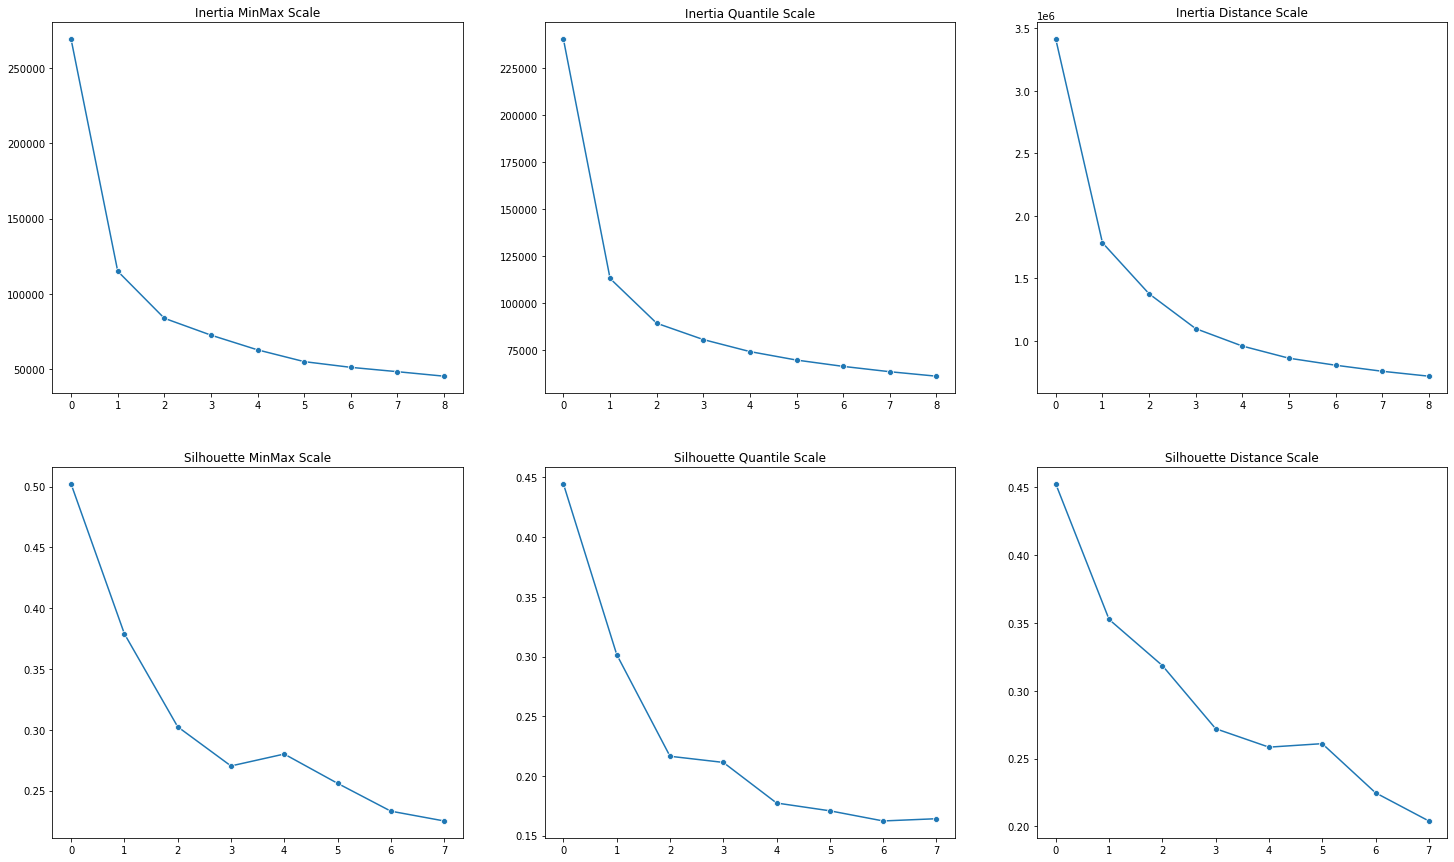

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(25, 15))

sns.lineplot(ax=axes[0,0], data=inertia_list_minmax, marker='o')
sns.lineplot(ax=axes[1,0], data=sil_score_minmax, marker='o')
sns.lineplot(ax=axes[0,1], data=quantile_inertia_list, marker='o')
sns.lineplot(ax=axes[1,1], data=quantile_sil_score, marker='o')
sns.lineplot(ax=axes[0,2], data=distance_inertia_list, marker='o')
sns.lineplot(ax=axes[1,2], data=distance_sil_score, marker='o')
axes[0,0].set_title("Inertia MinMax Scale")
axes[1,0].set_title("Silhouette MinMax Scale")
axes[0,1].set_title("Inertia Quantile Scale")
axes[1,1].set_title("Silhouette Quantile Scale")
axes[0,2].set_title("Inertia Distance Scale")
axes[1,2].set_title("Silhouette Distance Scale")



## With 5 clusters

In [14]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 5)
# 3. fit the model to the data
my_kmeans.fit(minmax_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(minmax_distances)
# 5. attach the cluster output to our original DataFrame
songs_for_4_clusters["cluster"] = clusters

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [15]:
songs_for_4_clusters = songs_for_4_clusters.reset_index()

In [16]:
# results = pd.concat([songs_for_4_clusters, songs_for_4_clusters.artist], axis=1)
# results = results.reindex(columns=['name','artist', 'danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature', 'cluster'])

In [17]:
songs_for_4_clusters.head(3)

,name,artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,0.1320,0.881,0.000006,0.144,0.952,74.139,3
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,0.0400,0.452,0.000009,0.107,0.591,127.150,3
2,Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,0.0311,0.944,0.000079,0.617,0.224,114.278,0


In [18]:
# sample_results = (
#     results.groupby('cluster')[['name', 'artist', 'cluster','danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence' ]]
#     .head(5).sort_values(by='cluster')
# )

### Sample of Playlists 5 clusters

In [19]:
# sample_results

In [21]:
(
    songs_for_4_clusters.groupby('cluster')[['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence']]
    .agg({
        'key':'mean', 
        'energy':'mean',
        'loudness':'mean', 
        'acousticness':'mean', 
        'tempo':'mean', 
        'instrumentalness':'mean',
        'speechiness':'mean',
        'valence':'mean'
    })
)

,key,energy,loudness,acousticness,tempo,instrumentalness,speechiness,valence
cluster,,,,,,,,
0,4.984615,0.182357,-16.729872,0.896518,106.527672,0.174674,0.045807,0.252498
1,7.866894,0.736764,-6.361857,0.128876,130.446621,0.099600,0.151916,0.523044
2,3.611111,0.701331,-6.529347,0.151519,116.390428,0.007804,0.102483,0.679561
3,4.936620,0.437148,-10.295701,0.645869,116.429796,0.027023,0.057418,0.547600
4,5.016949,0.140467,-21.653220,0.911059,100.077000,0.835270,0.043263,0.122591


In [ ]:
# state the label for each arm of the chart
categories = ['energy', 'loudness', 'acousticness','tempo ','instrumentalness','key','speechiness', 'valence']

# plot the initialised plot
fig = go.Figure()

# add a layer over the top of the initialised plot - this one is for cluster 0
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 0, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 0, 'valence'].mean()
],
      theta=categories,
      fill='toself',
      name='Cluster 0',
      marker=dict(color="blue")
))

# add a layer over the top of the initialised plot - this one is for cluster 1
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 1, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 1, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 1',
      marker=dict(color="red")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 2, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 2, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 2',
      marker=dict(color="green")
))

# add a layer over the top of the initialised plot - this one is for cluster 3
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 3, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 3, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 3',
      marker=dict(color="pink")
))

# add a layer over the top of the initialised plot - this one is for cluster 4
fig.add_trace(go.Scatterpolar(
      r=[result_means_distance.loc[result_means_distance["cluster"] == 4, 'key'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'energy'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'loudness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'acousticness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'tempo'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'instrumentalness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'speechiness'].mean(),
        result_means_distance.loc[result_means_distance["cluster"] == 4, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 4',
      marker=dict(color="yellow")
))



# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1])),` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of mean values of clusters',
  height = 500,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2.5]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()